In [1]:
%cd ..

/home/dawood/Workspace/pose-estimation


In [2]:
import torch
from data.coco import COCO
from models.openpose import Openpose
from torch.nn import functional as F
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = COCO('/home/dawood/Datasets/MSCOCO/val2017/', '/home/dawood/Datasets/MSCOCO/annotations/person_keypoints_val2017.json', augment=True)

model = Openpose()
model.load_state_dict(torch.load('/home/dawood/Experiments/HM+JM_Openpose_2/model_last.weights'))
model = model.eval()
model = model.cuda(device=1)

loading annotations into memory...
Done (t=0.75s)
creating index...
index created!


In [4]:
img, hm_gt, jm_gt, mask = data[979]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9863454158> (for post_execute):


ValueError: Floating point image RGB values must be in the 0..1 range.

ValueError: Floating point image RGB values must be in the 0..1 range.

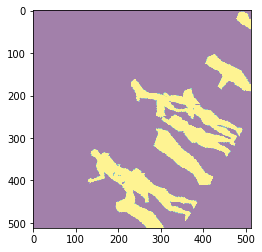

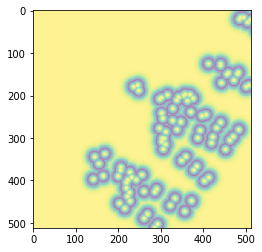

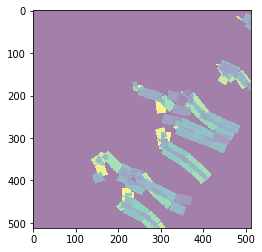

In [5]:
plt.imshow(img.permute(1,2,0).contiguous().numpy() )
plt.figure()
plt.imshow(mask.numpy(), alpha=0.5)
plt.figure()
plt.imshow(hm_gt.max(0)[0].numpy(), alpha=0.5)
plt.figure()
plt.imshow(abs(jm_gt[18:]).max(0)[0].numpy(), alpha=0.5)

In [6]:
preds = model(img.unsqueeze(0).cuda(device=1))

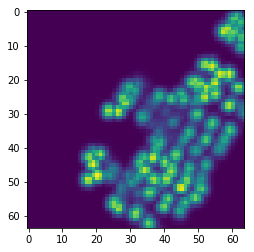

In [8]:
plt.imshow(preds[-1][0][0, :17].max(0)[0].cpu().detach().numpy())

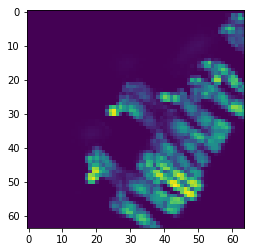

In [11]:
plt.imshow(abs(preds[-1][1][0]).max(0)[0].cpu().detach().numpy())

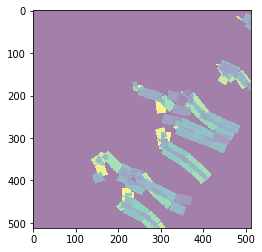

In [10]:
plt.imshow(abs(jm_gt[18:]).max(0)[0].numpy(), alpha=0.5)